
## USD vs EUR

In [1]:
%matplotlib inline

from datetime import datetime, timedelta
from pandas import Index
from pandas.io.data import DataReader
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
import requests

FIN_SERVICE_PROVIDER = 'yahoo'
PAST_DAYS = 60

# SYMBOL = ['IBM', 'AAPL']
SYMBOL = ['USD', 'EUR']

# today
t1 = datetime.now()
# two months later
t2 = t1 - timedelta(days=PAST_DAYS)

df1  = DataReader(SYMBOL[0],  FIN_SERVICE_PROVIDER , t2, t1)
df2  = DataReader(SYMBOL[1],  FIN_SERVICE_PROVIDER , t2, t1)

In [2]:
### USD

In [18]:
df1.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-03-09,94.29,94.43,93.83,94.33,3600,94.19749
2015-03-10,93.17,93.32,90.12,90.75,11500,90.62251
2015-03-11,91.80,93.45,91.62,91.93,4400,91.80086
2015-03-12,89.26,90.41,87.26,89.16,13800,89.03475
2015-03-13,88.23,90.60,87.52,90.60,5700,90.47272


### EUR

In [17]:
df2.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-03-09,32.30,32.51,32.19,32.25,310400,31.58
2015-03-10,32.25,32.47,30.89,31.15,488900,30.50
2015-03-11,31.20,31.42,30.99,31.25,207200,30.60
2015-03-12,31.40,31.40,30.93,31.30,319500,30.65
2015-03-13,31.55,31.89,30.98,31.75,331600,31.09


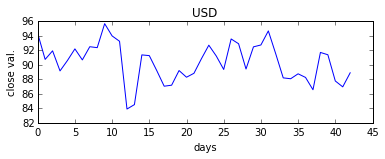

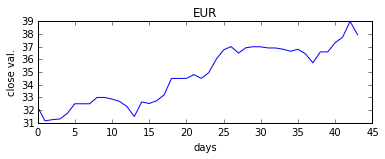

In [5]:
plt.figure(1)
plt.subplot(211)
plt.title(SYMBOL[0])
plt.xlabel('days')
plt.ylabel('close val.')
plt.plot(df1['Close'])

plt.figure(2)
plt.subplot(211)
plt.title(SYMBOL[1])
plt.xlabel('days')
plt.ylabel('close val.')
plt.plot(df2['Close'])

## Bitcoin History vs EUR

In [6]:
BIT_COIN_CSV_URL = 'http://www.quandl.com/api/v1/datasets/BCHARTS/KRAKENEUR.csv'

bcdf = read_csv(BIT_COIN_CSV_URL)
bcdf = bcdf[bcdf['Date']> t2.strftime("%Y-%m-%d")]
#bcdf = bcdf.iloc[::-1]
bcdf = bcdf.sort(['Date'], ascending=[True])
bcdf.index = Index(range(0, len(bcdf)))

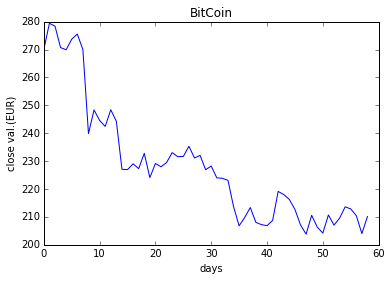

In [7]:
plt.title("BitCoin")
plt.xlabel('days')
plt.ylabel('close val.(EUR)')
plt.plot(bcdf['Close'])

### Close Price Statistics

#### Mean (in 60 Days)

In [8]:
bcdf['Close'].mean()

228.4929806779661

#### Variance (in 60 days)

In [9]:
bcdf['Close'].var()

466.33287018218783

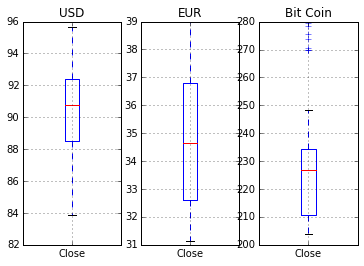

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax1.set_title(SYMBOL[0])
# ax1.title(SYMBOL[0])
ax1 = df1.boxplot(column='Close', return_type='axes')

ax2 = fig.add_subplot(1,3,2)
# ax2.plt.title(SYMBOL[1])
ax2.set_title(SYMBOL[1])
ax2 = df2.boxplot(column='Close', return_type='axes')

ax3 = fig.add_subplot(1,3,3)
# ax3.plt.title(SYMBOL[1])
ax3.set_title('Bit Coin')
ax3 = bcdf.boxplot(column='Close', return_type='axes')



### Gains

In [11]:
REAL_TIME_VALE_API = 'http://api.coindesk.com/v1/bpi/currentprice.json'
# REAL_TIME_VALE_API = "http://btc.blockr.io/api/v1/coin/info"
r = requests.get(REAL_TIME_VALE_API)
cur_value = 1
if r.status_code == 200:
    _j = r.json()['bpi']['EUR']
    cur_value = float(_j['rate'])
    print("Real time value {} {}".format(_j['rate'], _j['symbol']))

Real time value 217.8641 &euro;


Price per coin: €208.87

In [12]:
price_x_coin = 208.87
gain= float(cur_value) - float(price_x_coin)
print("Gain {}".format(gain))

Gain 8.9941


### Predict


### Errors evaluation

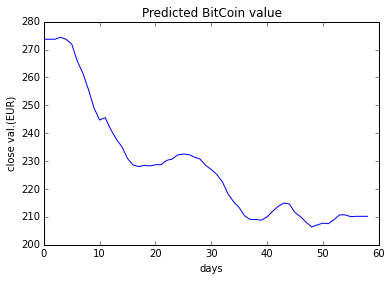

In [13]:
X = [ [x] for x in bcdf.index]
y = bcdf['Close']

from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X, list(y.values))

Y = [list(neigh.predict([[i]]))[0] for i in range(len(X))]

plt.title("Predicted BitCoin value")
plt.xlabel('days')
plt.ylabel('close val.(EUR)')
plt.plot(Y)

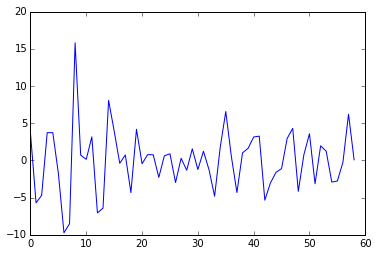

In [14]:
errors = [ Yi-yi for Yi, yi in zip(Y, y)]

plt.plot(errors)

In [15]:
import numpy as np

print("Error mean: {} ".format(np.mean(errors)))

Error mean: 0.0235204067797 


### Tomorrow's prediction

In [16]:
print("Tomorrow's predicted closing value {}".format(neigh.predict([[60]])))

Tomorrow's predicted closing value [ 210.210356]
